In [38]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow_hub as hub
import os
import json
import xmltodict

In [39]:
path = '/home/gal/Desktop/workspace/workspace/training/images/test_annotations'

In [40]:
all_annots = [os.path.join(path, element) for element in os.listdir(path) if '.xml' in element]

In [41]:
with open(all_annots[0], 'r') as file:
    data_dict = xmltodict.parse(file.read())

In [42]:
data_dict

OrderedDict([('annotation',
              OrderedDict([('folder', 'Bear'),
                           ('filename', '1b0609970765ba33.jpg'),
                           ('path', '1b0609970765ba33.jpg'),
                           ('source', OrderedDict([('database', 'Unknown')])),
                           ('size',
                            OrderedDict([('width', '512'),
                                         ('height', '512'),
                                         ('depth', '3')])),
                           ('segmented', '0'),
                           ('object',
                            [OrderedDict([('name', 'hand'),
                                          ('pose', 'Unspecified'),
                                          ('truncated', '0'),
                                          ('difficult', '0'),
                                          ('bndbox',
                                           OrderedDict([('xmin', '172'),
                                           

In [43]:
json_data = json.dumps(data_dict)

In [44]:
json_data

'{"annotation": {"folder": "Bear", "filename": "1b0609970765ba33.jpg", "path": "1b0609970765ba33.jpg", "source": {"database": "Unknown"}, "size": {"width": "512", "height": "512", "depth": "3"}, "segmented": "0", "object": [{"name": "hand", "pose": "Unspecified", "truncated": "0", "difficult": "0", "bndbox": {"xmin": "172", "ymin": "320", "xmax": "214", "ymax": "401"}}, {"name": "hand", "pose": "Unspecified", "truncated": "0", "difficult": "0", "bndbox": {"xmin": "475", "ymin": "235", "xmax": "494", "ymax": "279"}}]}}'

In [45]:
data = json.loads(json_data)

In [46]:
data

{'annotation': {'folder': 'Bear',
  'filename': '1b0609970765ba33.jpg',
  'path': '1b0609970765ba33.jpg',
  'source': {'database': 'Unknown'},
  'size': {'width': '512', 'height': '512', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'hand',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '172', 'ymin': '320', 'xmax': '214', 'ymax': '401'}},
   {'name': 'hand',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '475', 'ymin': '235', 'xmax': '494', 'ymax': '279'}}]}}

In [47]:
data['annotation']['object'][0]['bndbox']

{'xmin': '172', 'ymin': '320', 'xmax': '214', 'ymax': '401'}

In [48]:
for xml_file in all_annots:
    with open(xml_file, 'r') as file:
        data_dict = xmltodict.parse(file.read())
    
    json_data = json.dumps(data_dict)
    data = json.loads(json_data)
    bbox = {}
    try:
        for idx, element in enumerate(data['annotation']['object']):
            bbox[str(idx)] = element['bndbox']
    except TypeError:
        bbox['0'] = data['annotation']['object']['bndbox']
    
    with open(xml_file.replace('xml', 'json'), "w") as outfile:
        json.dump(bbox, outfile)

In [49]:
file_path = os.path.join(path, '1f9fe75c022544de.json')

In [50]:
data = json.load(open(file_path))

FileNotFoundError: [Errno 2] No such file or directory: '/home/gal/Desktop/workspace/workspace/training/images/test_annotations/1f9fe75c022544de.json'

In [51]:
data

{'annotation': {'folder': 'Bear',
  'filename': '001d650c55cbb338.jpg',
  'path': '001d650c55cbb338.jpg',
  'source': {'database': 'Unknown'},
  'size': {'width': '512', 'height': '512', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'hand',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '324', 'ymin': '119', 'xmax': '367', 'ymax': '167'}},
   {'name': 'hand',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '364', 'ymin': '190', 'xmax': '416', 'ymax': '240'}}]}}

In [46]:
image = cv2.imread(os.path.join(path, '1f9fe75c022544de.jpg'))    

In [50]:
for value in data.values():
    cv2.rectangle(image, (int(value['xmin']), int(value['ymin'])), (int(value['xmax']), int(value['ymax'])), (255, 0, 0))

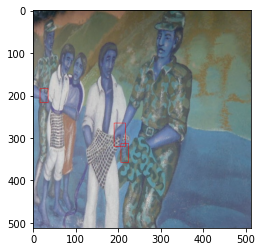

In [51]:
plt.imshow(image)